In [ ]:
'''This notebook showcase some weather stats for 4 stations in MD'''

# Import Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Import plotting libraries
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

In [2]:
MONTGOMERY = pd.read_csv("C:\\Users\\world\\Desktop\\MONTGOMERY_ USC00182325.csv")

In [4]:
BALTIMORE = pd.read_csv("C:\\Users\\world\\Desktop\\BALTIMORE_USW00093721.csv")

In [5]:
ALLEGANY = pd.read_csv("C:\\Users\\world\\Desktop\\ALLEGANY_ USC00182282.csv")

In [7]:
WICOMICO = pd.read_csv("C:\\Users\\world\\Desktop\\WICOMICO_ USW00093720.csv")

# Data Engineering & cleansing

In [9]:
#seperate the date to year month and day
#When using expand=True, the split elements will expand out into separate columns
MONTGOMERY['year']=MONTGOMERY['DATE'].str.extract('(?P<year>\d\d\d\d)-(?P<month>\d\d)-(?P<day>\d\d)',expand=True)['year']
MONTGOMERY['month']=MONTGOMERY['DATE'].str.extract('(?P<year>\d\d\d\d)-(?P<month>\d\d)-(?P<day>\d\d)',expand=True)['month']
MONTGOMERY['day']=MONTGOMERY['DATE'].str.extract('(?P<year>\d\d\d\d)-(?P<month>\d\d)-(?P<day>\d\d)',expand=True)['day']

BALTIMORE['year']=BALTIMORE['DATE'].str.extract('(?P<year>\d\d\d\d)-(?P<month>\d\d)-(?P<day>\d\d)',expand=True)['year']
BALTIMORE['month']=BALTIMORE['DATE'].str.extract('(?P<year>\d\d\d\d)-(?P<month>\d\d)-(?P<day>\d\d)',expand=True)['month']
BALTIMORE['day']=BALTIMORE['DATE'].str.extract('(?P<year>\d\d\d\d)-(?P<month>\d\d)-(?P<day>\d\d)',expand=True)['day']

ALLEGANY['year']=ALLEGANY['DATE'].str.extract('(?P<year>\d\d\d\d)-(?P<month>\d\d)-(?P<day>\d\d)',expand=True)['year']
ALLEGANY['month']=ALLEGANY['DATE'].str.extract('(?P<year>\d\d\d\d)-(?P<month>\d\d)-(?P<day>\d\d)',expand=True)['month']
ALLEGANY['day']=ALLEGANY['DATE'].str.extract('(?P<year>\d\d\d\d)-(?P<month>\d\d)-(?P<day>\d\d)',expand=True)['day']

WICOMICO['year']=ALLEGANY['DATE'].str.extract('(?P<year>\d\d\d\d)-(?P<month>\d\d)-(?P<day>\d\d)',expand=True)['year']
WICOMICO['month']=ALLEGANY['DATE'].str.extract('(?P<year>\d\d\d\d)-(?P<month>\d\d)-(?P<day>\d\d)',expand=True)['month']
WICOMICO['day']=ALLEGANY['DATE'].str.extract('(?P<year>\d\d\d\d)-(?P<month>\d\d)-(?P<day>\d\d)',expand=True)['day']

In [10]:
MONTGOMERY['DATE'] = pd.to_datetime(MONTGOMERY['DATE'])
BALTIMORE['DATE'] = pd.to_datetime(BALTIMORE['DATE'])
ALLEGANY['DATE'] = pd.to_datetime(ALLEGANY['DATE'])
WICOMICO['DATE'] = pd.to_datetime(WICOMICO['DATE'])

In [11]:
from datetime import date
MONTGOMERY_V2=MONTGOMERY.set_index('DATE')
BALTIMORE_V2=BALTIMORE.set_index('DATE')
ALLEGANY_V2=ALLEGANY.set_index('DATE')
WICOMICO_V2=WICOMICO.set_index('DATE')

In [13]:
#Lets dive deeper into: for a given day, wt's the difference between max temperature & min temperature
MONTGOMERY_V2['tem_range']=MONTGOMERY_V2['TMAX']-MONTGOMERY_V2['TMIN']
BALTIMORE_V2['tem_range']=BALTIMORE_V2['TMAX']-BALTIMORE_V2['TMIN']
ALLEGANY_V2['tem_range']=ALLEGANY_V2['TMAX']-ALLEGANY_V2['TMIN']
WICOMICO_V2['tem_range']=WICOMICO_V2['TMAX']-WICOMICO_V2['TMIN']

In [29]:
MONTGOMERY_V2_stats=MONTGOMERY_V2.groupby('year')['tem_range'].agg(['std', 'mean','median'])
BALTIMORE_V2_stats=BALTIMORE_V2.groupby('year')['tem_range'].agg(['std', 'mean','median'])
ALLEGANY_V2_stats=ALLEGANY_V2.groupby('year')['tem_range'].agg(['std', 'mean','median'])
WICOMICO_V2_stats=WICOMICO_V2.groupby('year')['tem_range'].agg(['std', 'mean','median'])

In [30]:
MONTGOMERY_V2_mode=MONTGOMERY_V2.groupby('year')['tem_range'].value_counts()
BALTIMORE_V2_mode=BALTIMORE_V2.groupby('year')['tem_range'].value_counts()
ALLEGANY_V2_mode=ALLEGANY_V2.groupby('year')['tem_range'].value_counts()
WICOMICO_V2_mode=WICOMICO_V2.groupby('year')['tem_range'].value_counts()

In [31]:
MONTGOMERY_V2_mode=pd.DataFrame(MONTGOMERY_V2_mode)
BALTIMORE_V2_mode=pd.DataFrame(BALTIMORE_V2_mode)
ALLEGANY_V2_mode=pd.DataFrame(ALLEGANY_V2_mode)
WICOMICO_V2_mode=pd.DataFrame(WICOMICO_V2_mode)

In [32]:
MONTGOMERY_V2_mode.columns=['count']
BALTIMORE_V2_mode.columns=['count']
ALLEGANY_V2_mode.columns=['count']
WICOMICO_V2_mode.columns=['count']

In [33]:
MONTGOMERY_V2_mode=.reset_index()
BALTIMORE_V2_mode=BALTIMORE_V2_mode.reset_index()
ALLEGANY_V2_mode=ALLEGANY_V2_mode.reset_index()
WICOMICO_V2_mode=WICOMICO_V2_mode.reset_index()

In [34]:
MONTGOMERY_V2_mode=MONTGOMERY_V2_mode.groupby('year').first()
BALTIMORE_V2_mode=BALTIMORE_V2_mode.groupby('year').first()
ALLEGANY_V2_mode=ALLEGANY_V2_mode.groupby('year').first()
WICOMICO_V2_mode=WICOMICO_V2_mode.groupby('year').first()

In [35]:
MONTGOMERY_final_stats=pd.merge(MONTGOMERY_V2_stats,MONTGOMERY_V2_mode,left_index=True, right_index=True)
BALTIMORE_final_stats=pd.merge(BALTIMORE_V2_stats,BALTIMORE_V2_mode,left_index=True, right_index=True)
ALLEGANY_final_stats=pd.merge(ALLEGANY_V2_stats,ALLEGANY_V2_mode,left_index=True, right_index=True)
WICOMICO_final_stats=pd.merge(WICOMICO_V2_stats,WICOMICO_V2_mode,left_index=True, right_index=True)

In [79]:
#Add in the tavg in the dataset
MONTGOMERY_V2['TAVG']=(MONTGOMERY_V2['TMAX']+MONTGOMERY_V2['TMIN'])/2
BALTIMORE_V2['TAVG']=(BALTIMORE_V2['TMAX']+BALTIMORE_V2['TMIN'])/2
ALLEGANY_V2['TAVG']=(ALLEGANY_V2['TMAX']+ALLEGANY_V2['TMIN'])/2
WICOMICO_V2['TAVG']=(WICOMICO_V2['TMAX']+WICOMICO_V2['TMIN'])/2

# Basic Tem-range & Avg Tem Plot for 4 stations

# Montgomery

Text(0.5, 1.0, 'Montgomery County')

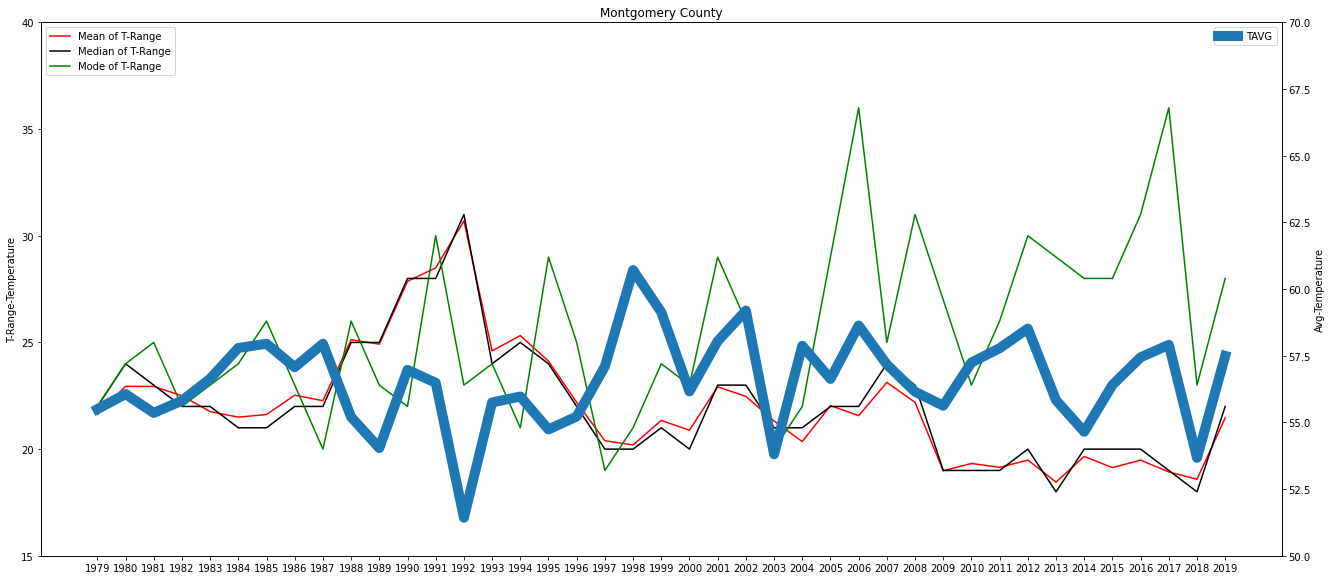

In [136]:
#fig, ax1 = plt.subplots()
fig=plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
ax1.plot(MONTGOMERY_final_stats['mean'],label='Mean of T-Range', color='red')
ax1.plot(MONTGOMERY_final_stats['median'],label='Median of T-Range',color='black')
ax1.plot(MONTGOMERY_final_stats['count'],label='Mode of T-Range',color='green')

ax1.set_ylim(15,40)
ax1.set_ylabel('T-Range-Temperature')
plt.tight_layout()
plt.legend(loc="upper left")


#Create second y-label
ax2 = ax1.twinx()  # join a second axis with the first graph we just made
ax2.set_ylabel('Avg-Temperature')
ax2.set_ylim(50,70)
ax2.plot(MONTGOMERY_V2.groupby('year')['TAVG'].mean(), label='TAVG', linewidth=10)

plt.legend(loc="upper right")
plt.title('Montgomery County')

# Baltimore

Text(0.5, 1.0, 'Baltimore County')

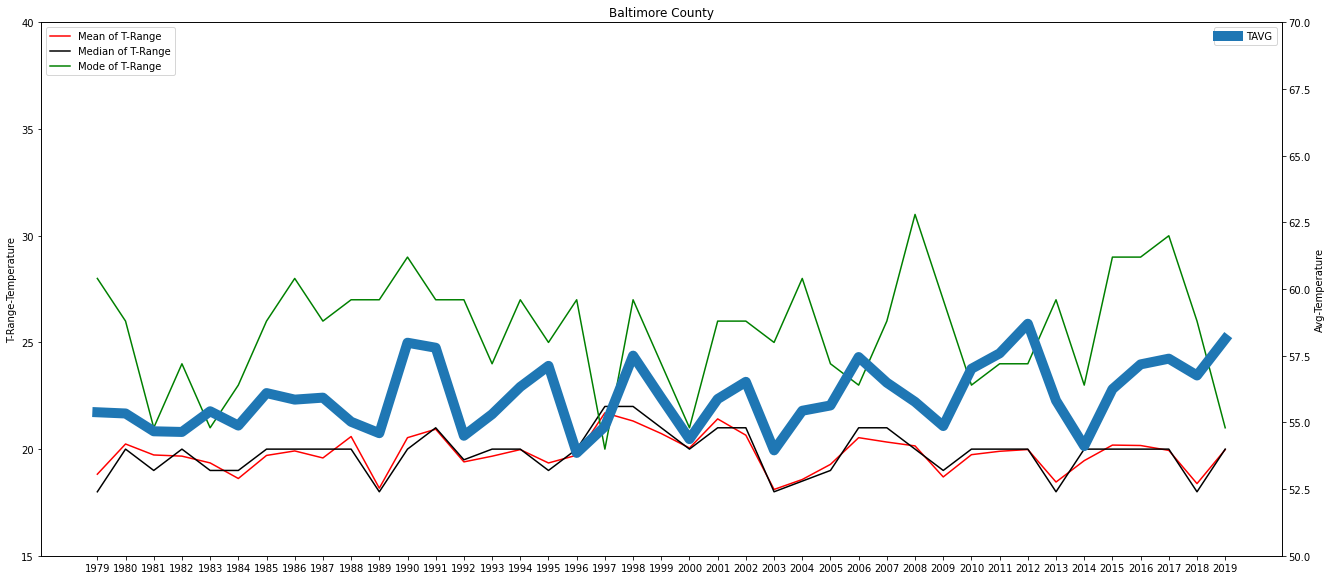

In [137]:
#fig, ax1 = plt.subplots()
fig=plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
ax1.plot(BALTIMORE_final_stats['mean'],label='Mean of T-Range', color='red')
ax1.plot(BALTIMORE_final_stats['median'],label='Median of T-Range',color='black')
ax1.plot(BALTIMORE_final_stats['count'],label='Mode of T-Range',color='green')

ax1.set_ylim(15,40)
ax1.set_ylabel('T-Range-Temperature')
plt.tight_layout()
plt.legend(loc="upper left")



ax2 = ax1.twinx()  # join a second axis with the first graph we just made
ax2.set_ylabel('Avg-Temperature')
ax2.set_ylim(50,70)
ax2.plot(BALTIMORE_V2.groupby('year')['TAVG'].mean(), label='TAVG', linewidth=10)

plt.legend(loc="upper right")
plt.title('Baltimore County')

# ALLEGANY

Text(0.5, 1.0, 'Allegany County')

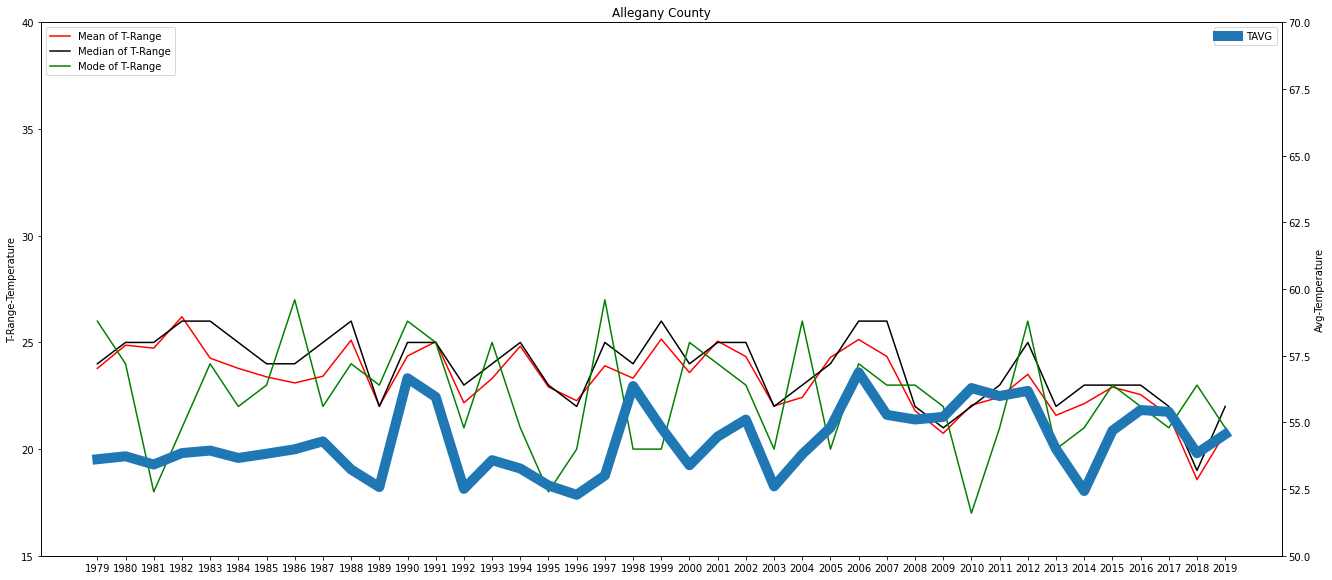

In [138]:
#fig, ax1 = plt.subplots()
fig=plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
ax1.plot(ALLEGANY_final_stats['mean'],label='Mean of T-Range', color='red')
ax1.plot(ALLEGANY_final_stats['median'],label='Median of T-Range',color='black')
ax1.plot(ALLEGANY_final_stats['count'],label='Mode of T-Range',color='green')

ax1.set_ylim(15,40)
ax1.set_ylabel('T-Range-Temperature')
plt.tight_layout()
plt.legend(loc="upper left")



ax2 = ax1.twinx()  # join a second axis with the first graph we just made
ax2.set_ylabel('Avg-Temperature')
ax2.set_ylim(50,70)
ax2.plot(ALLEGANY_V2.groupby('year')['TAVG'].mean(), label='TAVG',linewidth=10)

plt.legend(loc="upper right")
plt.title('Allegany County')

# WICOMICO

Text(0.5, 1.0, 'Wicomico County')

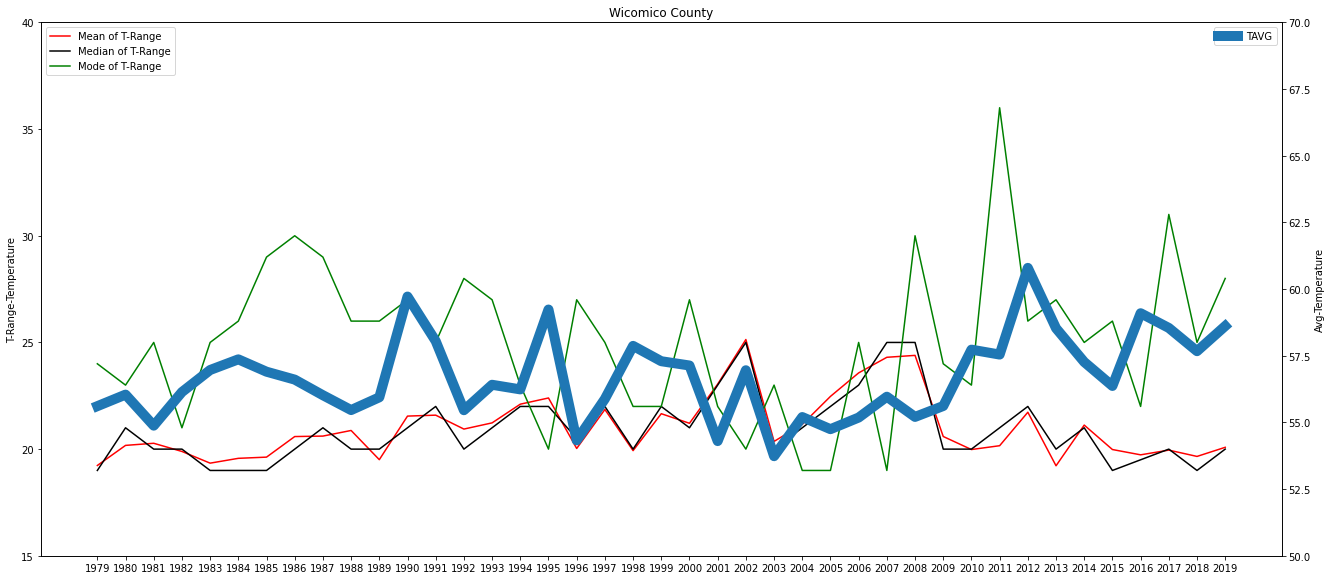

In [139]:
#fig, ax1 = plt.subplots()
fig=plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
ax1.plot(WICOMICO_final_stats['mean'],label='Mean of T-Range', color='red')
ax1.plot(WICOMICO_final_stats['median'],label='Median of T-Range',color='black')
ax1.plot(WICOMICO_final_stats['count'],label='Mode of T-Range',color='green')

ax1.set_ylim(15,40)
ax1.set_ylabel('T-Range-Temperature')
plt.tight_layout()
plt.legend(loc="upper left")



ax2 = ax1.twinx()  # join a second axis with the first graph we just made
ax2.set_ylabel('Avg-Temperature')
ax2.set_ylim(50,70)
ax2.plot(WICOMICO_V2.groupby('year')['TAVG'].mean(), label='TAVG',linewidth=10)

plt.legend(loc="upper right")
plt.title('Wicomico County')

# Create [tem-range from 20F~70F count days per year plot] for 4 stations

In [184]:
#Create a column called tem_range_category for motgomery_v2 table~
x=[]
for i in MONTGOMERY_V2['tem_range']:
    if i >=0 and i<=19:
        x.append('0-19')
    else:
        x.append('20-70')

MONTGOMERY_V2['tem_range_category']=x




tem_range_table_montgomery=pd.DataFrame(MONTGOMERY_V2.groupby('year')['tem_range_category'].value_counts())
tem_range_table_montgomery.columns = ['count_days']


SyntaxError: invalid syntax (<ipython-input-184-7c799074a442>, line 20)

In [198]:
MONTGOMERY_V2.head()

,STATION,NAME,TMAX,TMIN,year,month,day,tem_range,TAVG,tem_range_category
DATE,,,,,,,,,,
1979-01-01,USC00182325,"DALECARLIA RESERVOIR, MD US",63.0,39.0,1979,01,01,24.0,51.0,20-70
1979-01-02,USC00182325,"DALECARLIA RESERVOIR, MD US",65.0,39.0,1979,01,02,26.0,52.0,20-70
1979-01-03,USC00182325,"DALECARLIA RESERVOIR, MD US",40.0,7.0,1979,01,03,33.0,23.5,20-70
1979-01-04,USC00182325,"DALECARLIA RESERVOIR, MD US",34.0,7.0,1979,01,04,27.0,20.5,20-70
1979-01-05,USC00182325,"DALECARLIA RESERVOIR, MD US",45.0,20.0,1979,01,05,25.0,32.5,20-70


In [206]:
#For other three locations, we used different method (easier one ) to create
df3=ALLEGANY_V2[(ALLEGANY_V2['tem_range']>=20) & (ALLEGANY_V2['tem_range']<=70)].groupby('year')['tem_range'].count()
df2=BALTIMORE_V2[(BALTIMORE_V2['tem_range']>=20) & (BALTIMORE_V2['tem_range']<=70)].groupby('year')['tem_range'].count()
df4=WICOMICO_V2[(WICOMICO_V2['tem_range']>=20) & (WICOMICO_V2['tem_range']<=70)].groupby('year')['tem_range'].count()

In [173]:
#Montgomery
df1=pd.DataFrame(MONTGOMERY_V2[MONTGOMERY_V2['tem_range_category']=='20-70'].groupby('year')['tem_range_category'].value_counts())
df1=df1.droplevel(level=1)
df1.head()

,tem_range_category
year,
1979,220
1980,242
1981,245
1982,237
1983,223


Text(131.875, 0.5, 'Days Count Each Year')

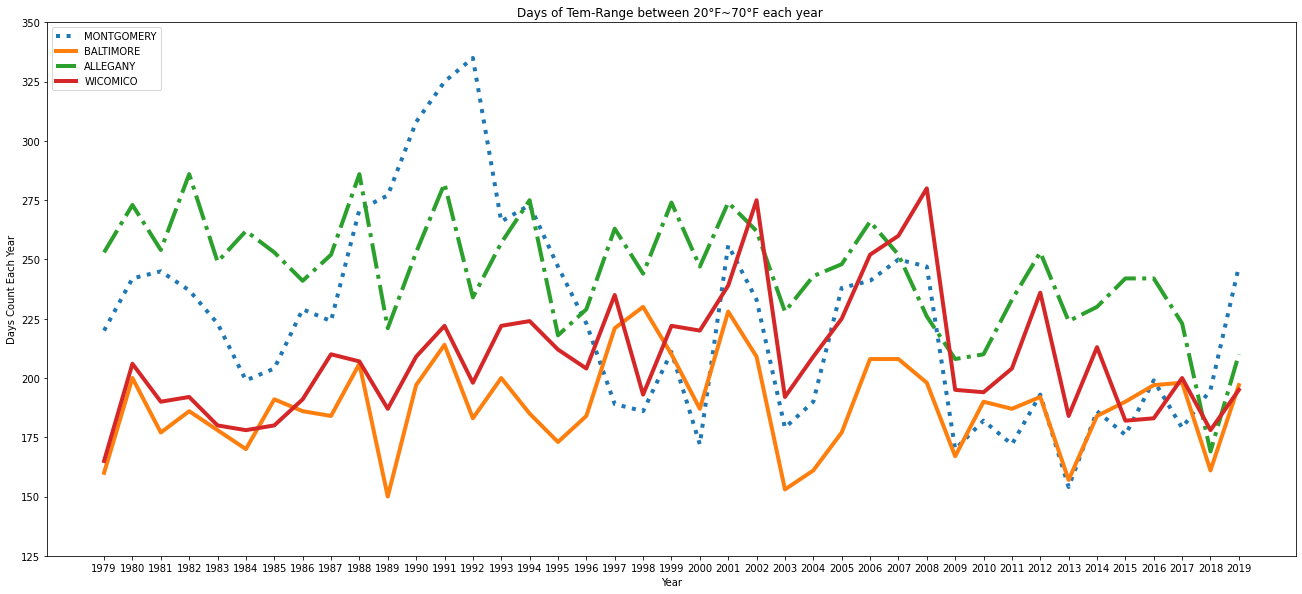

In [221]:
plt.figure(figsize=(18,8))
plt.ylim(125,350)
#tem_range_table_montgomery.iloc[tem_range_table_montgomery.index.get_level_values('tem_range_category') == '20-70']
#tem_range_table_Baltimore.iloc[tem_range_table_Baltimore.index.get_level_values('tem_range_category') == '20-70'].iplot('line')
plt.plot(df1,label='MONTGOMERY',linewidth=4, linestyle=':')
plt.plot(df2, label='BALTIMORE',linewidth=4, linestyle='-')
plt.plot(df3, label='ALLEGANY',linewidth=4, linestyle='-.')
plt.plot(df4, label='WICOMICO',linewidth=4, linestyle='-')

plt.tight_layout()
plt.legend(loc="upper left")
plt.title('Days of Tem-Range between 20°F~70°F each year ')
plt.xlabel('Year')
plt.ylabel('Days Count Each Year')


#tem_range_table_montgomery.iloc[tem_range_table_montgomery.index.get_level_values('tem_range_category') == '20-70'].plot()